In [29]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed

In [30]:
# Some functions to help out with
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real Indicator VALUE')
    plt.plot(predicted, color='blue',label='Predicted INDICATOR VALUE')
    plt.title('Indicator Prediction')
    plt.xlabel('Time-not real time in fact')
    plt.ylabel('Indicator real value')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [31]:
#!pip install statsmodels

from statsmodels.tsa.statespace.varmax import VARMAX
from random import random
import pandas as pd 
import numpy as np
import warnings
import matplotlib.pyplot as plt

warnings.simplefilter('ignore')

# Common code for display result
def show_graph(df1,df2,title):
    data = pd.concat([df1, df2])
    data.reset_index(inplace=True, drop=True)
    for col in data.columns:
        if col.lower().startswith('pred'):
            data[col].plot(label=col,linestyle="dotted")
        else:
            data[col].plot(label=col)
    #plt.title(title)
   # plt.legend()
    plt.show()

import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
user='alexandrudaia'
pass_='invoicecash'
import mysql.connector as m
connection = m.connect(host='127.0.0.1', user=user,
                       password=pass_, database='MYSQL')
cursor = connection.cursor()
  
# Getting all the table names
cursor.execute('SHOW TABLES;')
table_names = []
for record in cursor.fetchall():
    table_names.append(record[0])
cursor = connection.cursor(buffered=True)

cursor.execute("SELECT * FROM db_mfinante_fin_test WHERE reg_number=43480468")

myresult = cursor.fetchall()

#for x in myresult:
#  print(x)
num_fields = len(cursor.description)
field_names = [i[0] for i in cursor.description]

In [32]:
cursor = connection.cursor(buffered=True)

cursor.execute("SELECT * FROM db_mfinante_fin_test")

myresult = cursor.fetchall()

#for x in myresult:
#  print(x)

In [33]:
train=pd.DataFrame(myresult, columns=field_names)
cursor = connection.cursor(buffered=True)

cursor.execute("SELECT * FROM db_mfinante_company_2021")

myresult = cursor.fetchall()

#for x in myresult:
#  print(x)
num_fields = len(cursor.description)
field_names = [i[0] for i in cursor.description]
train_second=pd.DataFrame(myresult, columns=field_names)
data=train.merge(train_second, on='reg_number',how='left')

In [34]:
del train 
del train_second 
del myresult
del cursor

In [35]:
cols=[ 'year','nace_division','noncurrent_assets','current_assets','inventories','receivables'
      ,'cash_and_bank','prepaid_expenses','payables','advance_payments',
      'share_capital','state_owned_capital','net_turnover','total_income','total_expenses',
      'gross_profit_or_loss','net_profit_or_loss','employee_count'
      ,'publish','year_registered','year_inactive','year_fin_last_submitted','legal_status_valid','reg_number']

In [36]:
#get only the ones where there is no inactive years 
data = data[data['year_inactive'].isna()]
data=data[cols]

In [37]:
data=data.drop(['inventories',  'noncurrent_assets'],axis=1)
data= data.drop(['gross_profit_or_loss', 'legal_status_valid', 'publish', 'total_expenses'],axis=1)
data=data.drop(['nace_division', 'year_registered','year_inactive','year_fin_last_submitted'],axis=1)

In [38]:
#filling nans with mean by company
for col in  data.columns :
    print(col )
    if col not in ['reg_number']:
        data[col] = data[col].fillna(data.groupby('reg_number')[col].transform('mean'))

year
current_assets
receivables
cash_and_bank
prepaid_expenses
payables
advance_payments
share_capital
state_owned_capital
net_turnover
total_income
net_profit_or_loss
employee_count
reg_number


In [39]:
data.shape

(7361989, 14)

In [40]:
#toti care au 2020 
df=data.query("year==2020")
df=df.reset_index(inplace=False)
df.head()
df=df.drop('index',axis=1)
df.shape

(782506, 14)

In [41]:
#toti care au year 2020 mai pot avea si alt year mai mic deci subsetam dupa id-urile care au cu siguranta 2020
all_with_2020=data[data.reg_number.isin(list(df['reg_number']))]

In [42]:
all_with_2020.shape

(5949793, 14)

In [43]:
#all_with_2020=all_with_2020.drop('state_owned_capital',axis=1)

In [44]:
#y=all_with_2020['receivables']

In [45]:
#X=all_with_2020.drop('receivables',axis=1)

In [110]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [47]:
training_set=all_with_2020[:(all_with_2020.shape[0]-df.shape[0])]
print(training_set.shape[0])

5167287


In [48]:
test_set=all_with_2020[(all_with_2020.shape[0]-df.shape[0]):]
print(test_set.shape)

(782506, 14)


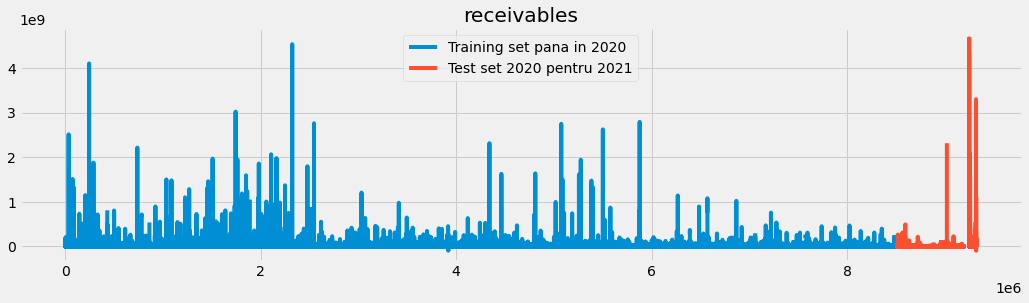

In [49]:
 
training_set['receivables'].plot(figsize=(16,4),legend=True)
test_set['receivables'].plot(figsize=(16,4),legend=True)
plt.legend(['Training set pana in 2020','Test set 2020 pentru 2021'])
plt.title('receivables')
plt.show()


In [50]:
X_train = []
y_train = []
temp_train=training_set.drop(['reg_number','receivables'],axis=1)
for i in range(3,training_set.shape[0]):
    if i%500000==0:
        print(i)
    
    X_train.append(temp_train[i-3:i-1])
    y_train.append(training_set['receivables'].iloc[i])
#X_train, y_train = np.array(X_train), np.array(y_train)

500000
1000000
1500000
2000000
2500000
3000000
3500000
4000000
4500000
5000000


In [51]:
del training_set 
del df 
del all_with_2020
del data
del temp_train

In [52]:
X_train=np.array(X_train)

In [74]:
X_train.shape

(5167284, 2, 12)

In [54]:
y_train=np.array(y_train)

In [86]:
 from keras import backend as K
def root_mean_squared_error(y_true, y_pred):
    return K.abs(K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1)))

In [90]:
X_train=np.nan_to_num(X_train)

In [92]:
y_train=np.nan_to_num(y_train)

In [70]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],12))

In [102]:
#! pip uninstall tensorflow


In [ ]:
#! pip install tensorflow-gpu

In [104]:
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],12)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss=root_mean_squared_error)
# Fitting to the training set
regressor.fit(X_train,y_train,epochs=2,batch_size=32)

Epoch 1/2
161478/161478 [==============================] - 769s 5ms/step - loss: 615516.6250
Epoch 2/2
161478/161478 [==============================] - 762s 5ms/step - loss: 614245.6875


In [106]:
pred=regressor.predict(X_train)

161478/161478 [==============================] - 253s 2ms/step


In [111]:
mean_squared_error(pred,y_train)

198026980742167.9

In [109]:
y_train.shape

(5167284,)